# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer
- Spambase
- Car evaluation
- Mushroom

For each of these a `.names` file is provided with details on the origin of data.

# Exercise 1: Breast Cancer



## 1.a: Load the Data
Use `pandas.read_csv` to load the data and assess the following:
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [44]:
import pandas as pd
from sklearn.svm import SVC
cancer = pd.read_csv('../../assets/datasets/breast_cancer.csv')

# Drop ? mark rows
cancer = cancer[cancer['Bare_Nuclei'] != '?'].astype(int)
X = cancer.drop(['Sample_code_number','Class'],axis = 1)
y = [(x == 2).astype(int) for x in cancer['Class']]
# car = pd.read_csv('../../assets/datasets/car.csv')
# mushroom = pd.read_csv('../../assets/datasets/mushroom.csv')
# spambase = pd.read_csv('../../assets/datasets/spambase.csv')


2    444
4    239
Name: Class, dtype: int64

## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
print "Baseline is %s" % (sum(y) / float(len(y)))

Baseline is 0.650073206442


In [4]:
model = SVC(kernel='linear')
print np.mean(cross_val_score(model, X, y, cv=3))

0.96489295927


In [5]:
model = SVC(kernel='rbf')
print np.mean(cross_val_score(model, X, y, cv=3))

0.95758301775


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

model = SVC(kernel='linear')
print np.mean(cross_val_score(model, X, y, cv=3))

model = SVC(kernel='rbf')
print np.mean(cross_val_score(model, X, y, cv=3))
print "SVC with RBF is best after normalizing"

0.966354947575
0.96928536466
SVC with RBF is best after normalizing


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print "<------------------------------------------->"
cnf = confusion_matrix(y_test, y_pred)
print "CONFUSION MATRIX"
print pd.DataFrame(cnf, columns = ['pred_cancer', 'pred_no_cancer'], 
                   index = ['cancer', 'no_cancer'])
print "<------------------------------------------->"
print classification_report(y_test, y_pred, target_names = ['cancer', 'no_cancer'])

print "More false positives, it is better to predict having cancer and not have it happen than the other way around."

<------------------------------------------->
CONFUSION MATRIX
           pred_cancer  pred_no_cancer
cancer              78               1
no_cancer            6             141
<------------------------------------------->
             precision    recall  f1-score   support

     cancer       0.93      0.99      0.96        79
  no_cancer       0.99      0.96      0.98       147

avg / total       0.97      0.97      0.97       226

More false positives, it is better to predict having cancer and not have it happen than the other way around.


**Check:** Are there more false positives or false negatives? Is this good or bad?

## 1.c: Feature Selection

Use any of the strategies offered by `sklearn` to select the most important features.

Repeat the cross validation with only those 5 features. Does the score change?

In [8]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selected_data = selector.fit_transform(X, y)
model = SVC(kernel='rbf')

print np.mean(cross_val_score(model, selected_data, y, cv=3))
print "Model gets worse with feature elimination"

0.966354947575
Model gets worse with feature elimination


## 1.d: Learning Curves

Learning curves are useful to study the behavior of training and test errors as a function of the number of datapoints available.

- Plot learning curves for train sizes between 10% and 100% (use StratifiedKFold with 5 folds as cross validation)
- What can you say about the dataset? do you need more data or do you need a better model?

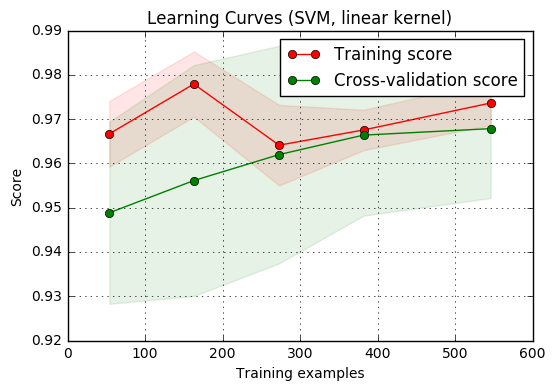

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVM, linear kernel)"
plot_learning_curve(SVC(kernel='linear'), title, X, y, train_sizes=[.1, .3, .5, .7, 1], cv=5)

plt.show()

##  1.e: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [15]:
from sklearn.model_selection import GridSearchCV
X = cancer.drop(['Sample_code_number','Class'],axis = 1)
y = [(x == 2).astype(int) for x in cancer['Class']]


param_grid = {'C': [.0001,.001,.01,.1,1,3,10,100],
              'kernel': ['rbf','linear'],}
svc = GridSearchCV(SVC(), param_grid)
svc.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 3, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
print svc.best_params_
print svc.best_score_


{'kernel': 'linear', 'C': 0.001}
0.966325036603


# Exercise 2
Now that you've completed steps 1.a through 1.e it's time to tackle some harder datasets. But before we do that, let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

> Answer: see above

## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes

> Answer: see above

## 2.c: Learning Curves
Implement a function `do_learning_curve(model, X, y, sizes)` that automates drawing the learning curves:
- Allow for sizes input
- Use 5-fold StratifiedKFold cross validation

> Answer: see above

## 2.d: Grid Search
Implement a function `do_grid_search(model, parameters)` that automates the grid search by doing:
- Calculate grid search
- Print best parameters
- Print best score
- Return best estimator


> Answer: see above

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def do_cv(model, X, y, cv):
    mean = np.mean(cross_val_score(model, X, y, cv=cv))
    std = np.std(cross_val_score(model, X, y, cv=cv))
    print model
    print "Mean: %s" % mean
    print "Std: %s" % std
    return mean, std

def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print "<------------------------------------------->"
    cnf = confusion_matrix(y_test, y_pred)
    print "CONFUSION MATRIX"
    print pd.DataFrame(cnf, index = names)
    print "<------------------------------------------->"
    print classification_report(y_test, y_pred, target_names = names)

# SEE PLOT LEARNING CURVE FROM ABOVE 


def do_grid_search(model, parameters):
    svc = GridSearchCV(model, parameters)
    svc.fit(X, y)
    print svc.best_params_
    print svc.best_score_
    return svc.best_estimator_

    

# Exercise 3
Using the functions above, analyze the Spambase dataset.

Notice that now you have many more features. Focus your attention on step C => feature selection

- Load the data and get to X, y
- Select the 15 best features
- Perform grid search to determine best model
- Display learning curves

In [46]:
spambase = pd.read_csv('../../assets/datasets/spambase.csv')

X = spambase.drop(['class'],axis = 1)
y = spambase['class']

selector = SelectKBest(f_classif, k=15)
selected_data = selector.fit_transform(X, y)

In [39]:
X = selected_data
param_grid = {'C': [.001,.01,.1,1,3,10]}
best_estimator = do_grid_search(SVC(), param_grid)


{'C': 3}
0.823951314932


In [49]:
# title = "Learning Curves (SVM, linear kernel)"
# plot_learning_curve(best_estimator, title, X, y, train_sizes=[.1, .3, .5, .7, 1], cv=5)

# plt.show()
print "Not sure what is broken with my learning curve plot"

Not sure what is broken with my learning curve plot


# Exercise 4
Repeat steps 1.a - 1.e for the car dataset. Notice that now features are categorical, not numerical.
- Find a suitable way to encode them
- How does this change our modeling strategy?

Also notice that the target variable `acceptability` has 4 classes. How do we encode them?


In [76]:
from sklearn.preprocessing import LabelEncoder

car = pd.read_csv('../../assets/datasets/car.csv')
data = car.drop('acceptability', axis = 1)

mappy = {
    'low' : 1, 'small': 1, 'unacc': 1,
    'med' : 2, 'acc': 2, '2': 2,
    'high': 3, 'big' : 3, 'good': 3, '3': 3,
    'vhigh': 4,'vgood': 4, '4': 4,
    '5more': 5,
    'more': 6,
}

df = data.applymap(lambda x : mappy[x])

le = LabelEncoder()
y = le.fit_transform(car['acceptability'])
cv = 5

In [77]:
print "-------"
do_cv(SVC(kernel = 'linear'), df, y, cv)
print "-------"
do_cv(SVC(kernel = 'rbf'), df, y, cv)


-------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean: 0.775295738675
Std: 0.102383856167
-------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean: 0.888325043689
Std: 0.0291151844955


(0.88832504368866783, 0.029115184495503009)

In [82]:
labels = ['unacc', 'acc', 'vgood', 'good']
do_cm_cr(SVC(kernel = 'rbf'), df, y, labels)    

<------------------------------------------->
CONFUSION MATRIX
         0   1    2   3
unacc  121   0    6   0
acc      5  18    0   0
vgood   12   0  388   0
good     3   0    0  18
<------------------------------------------->
             precision    recall  f1-score   support

      unacc       0.86      0.95      0.90       127
        acc       1.00      0.78      0.88        23
      vgood       0.98      0.97      0.98       400
       good       1.00      0.86      0.92        21

avg / total       0.96      0.95      0.95       571



In [85]:
X = df
param_grid = {'C': [.0001,.001,.01,.1,1,3,10,50, 100],
              'kernel': ['rbf','linear'],}

best_estimator = do_grid_search(SVC(kernel = 'rbf'), param_grid)


{'kernel': 'rbf', 'C': 10}
0.829861111111


# Bonus
Repeat steps 1.a - 1.e for the mushroom dataset. Notice that now features are categorical, not numerical. This dataset is quite large.
- How does this change our modeling strategy?
- Can we use feature selection to improve this?
